In [133]:
# Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler

In [134]:
# Loading the dataset
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### Data Dictionary

- num_passengers = number of passengers travelling
- sales_channel = sales channel booking was made on
- trip_type = trip Type (Round Trip, One Way, Circle Trip)
- purchase_lead = number of days between travel date and booking date
- length_of_stay = number of days spent at destination
- flight_hour = hour of flight departure
- flight_day = day of week of flight departure
- route = origin -> destination flight route
- booking_origin = country from where booking was made
- wants_extra_baggage = if the customer wanted extra baggage in the booking
- wants_preferred_seat = if the customer wanted a preferred seat in the booking
- wants_in_flight_meals = if the customer wanted in-flight meals in the booking
- flight_duration = total duration of flight (in hours)
- booking_complete = flag indicating if the customer completed the booking

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [137]:
# Checking for duplicates
df.duplicated().sum()

719

In [138]:
df.drop_duplicates(inplace = True)

In [139]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


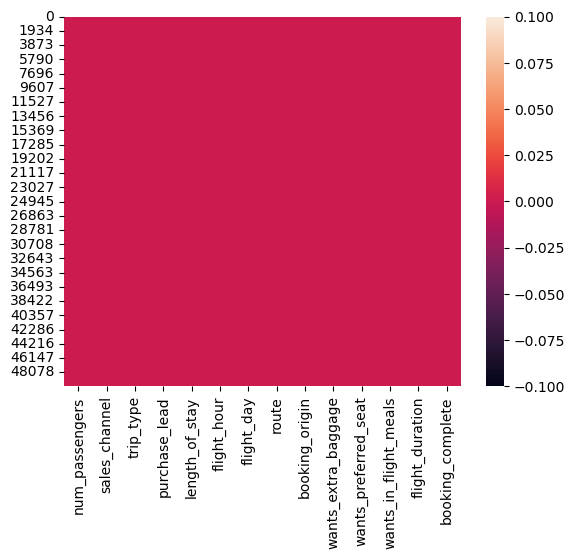

In [140]:
# Confirming and Visualizing Missing Values

print(df.isnull().sum())
sns.heatmap(df.isnull());

C:\Users\Admin\AppData\Local\Temp\ipykernel_15036\3305017275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sales_channel"], data = df, orient='h', palette='viridis')


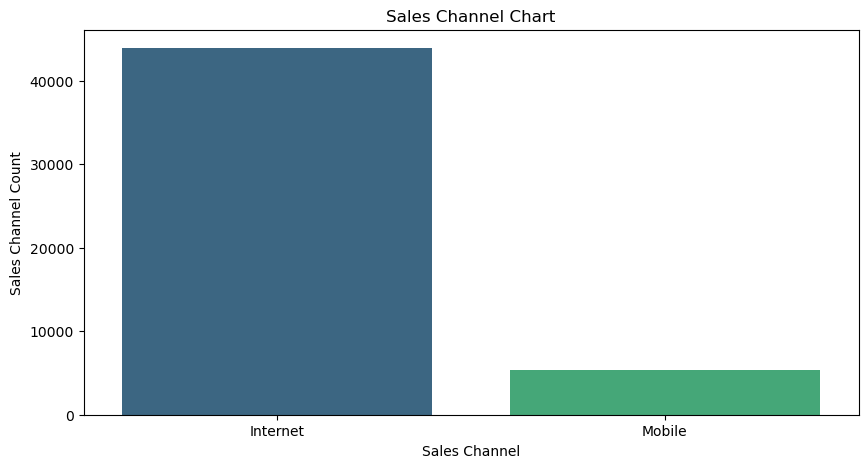

In [141]:
df["sales_channel"].unique()
df["sales_channel"].value_counts()


plt.figure(figsize=(10,5))
sns.countplot(x=df["sales_channel"], data = df, orient='h', palette='viridis')
plt.title("Sales Channel Chart")
plt.ylabel("Sales Channel Count")
plt.xlabel("Sales Channel");

trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_15036\2238786816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["trip_type"], data = df, orient='h', palette='viridis')


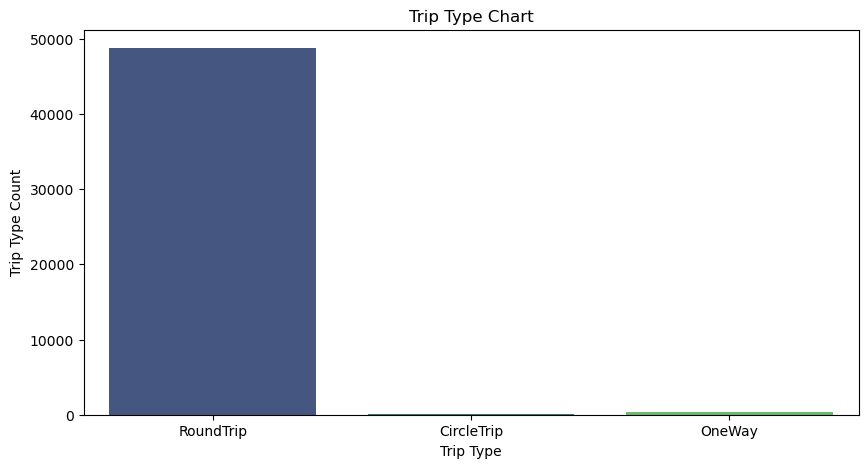

In [142]:
print(df["trip_type"].value_counts())


plt.figure(figsize=(10,5))
sns.countplot(x=df["trip_type"], data = df, orient='h', palette='viridis')
plt.title("Trip Type Chart")
plt.ylabel("Trip Type Count")
plt.xlabel("Trip Type");

C:\Users\Admin\AppData\Local\Temp\ipykernel_15036\1109814133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["flight_day"], data = df, orient='h', palette='viridis')


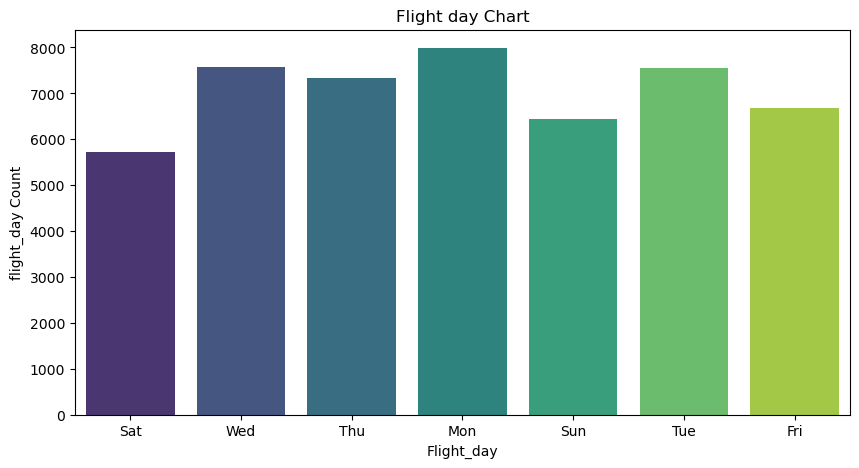

In [143]:
df["flight_day"].value_counts()


plt.figure(figsize=(10,5))
sns.countplot(x=df["flight_day"], data = df, orient='h', palette='viridis')
plt.title("Flight day Chart")
plt.ylabel("flight_day Count")
plt.xlabel("Flight_day");

C:\Users\Admin\AppData\Local\Temp\ipykernel_15036\3278599554.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["booking_complete"], data = df, orient='h', palette='viridis')


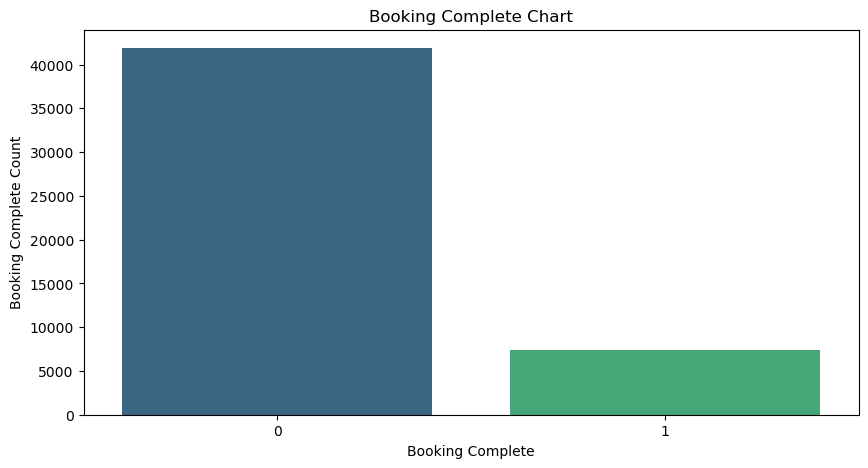

In [144]:
df["booking_complete"].value_counts()


plt.figure(figsize=(10,5))
sns.countplot(x=df["booking_complete"], data = df, orient='h', palette='viridis')
plt.title("Booking Complete Chart")
plt.ylabel("Booking Complete Count")
plt.xlabel("Booking Complete");

## Bivariate Analysis


C:\Users\Admin\AppData\Local\Temp\ipykernel_15036\1039086243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= "sales_channel", y="booking_complete", data = df, orient='v', palette='viridis')


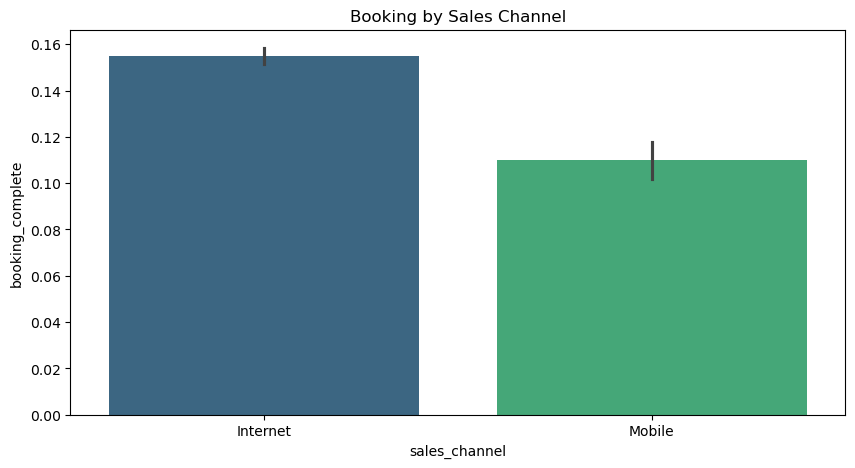

In [146]:
plt.figure(figsize=(10,5))
sns.barplot( x= "sales_channel", y="booking_complete", data = df, orient='v', palette='viridis')
plt.title("Booking by Sales Channel");


C:\Users\Admin\AppData\Local\Temp\ipykernel_15036\3331361332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= "trip_type", y="booking_complete", data = df, orient='v', palette='viridis')


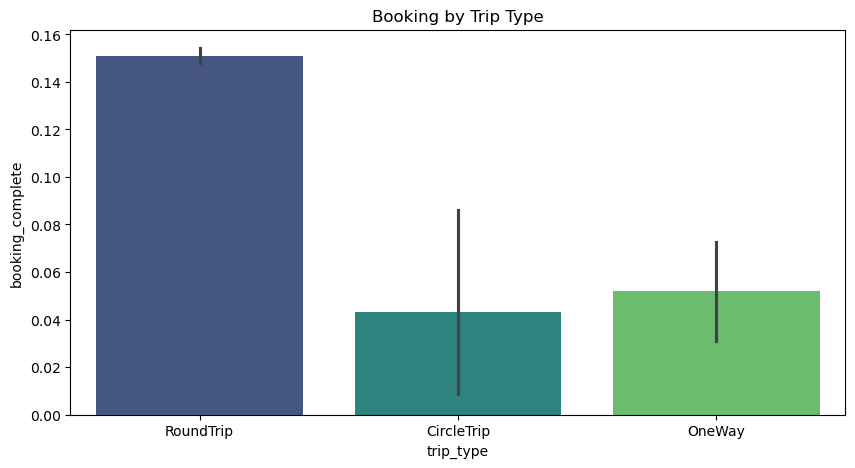

In [147]:
plt.figure(figsize=(10,5))
sns.barplot( x= "trip_type", y="booking_complete", data = df, orient='v', palette='viridis')
plt.title("Booking by Trip Type");

In [148]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_15036\2693128566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x= "num_passengers", y="length_of_stay", data = df, orient='v', palette='viridis')


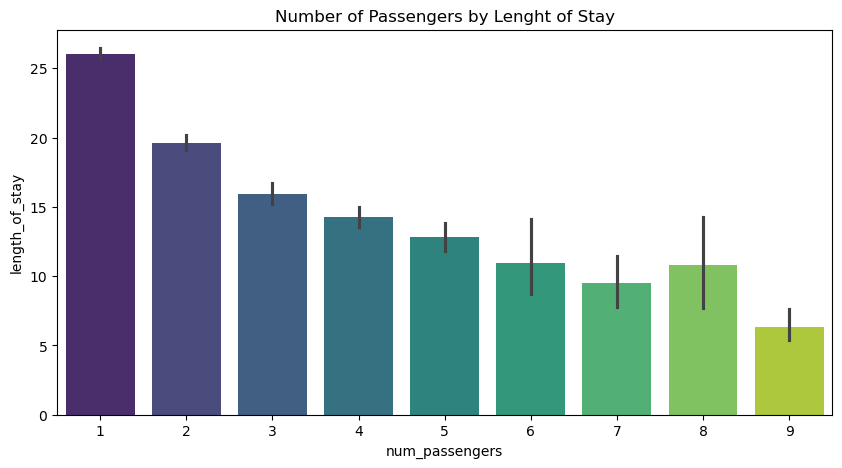

In [149]:
plt.figure(figsize=(10,5))
sns.barplot( x= "num_passengers", y="length_of_stay", data = df, orient='v', palette='viridis')
plt.title("Number of Passengers by Lenght of Stay");

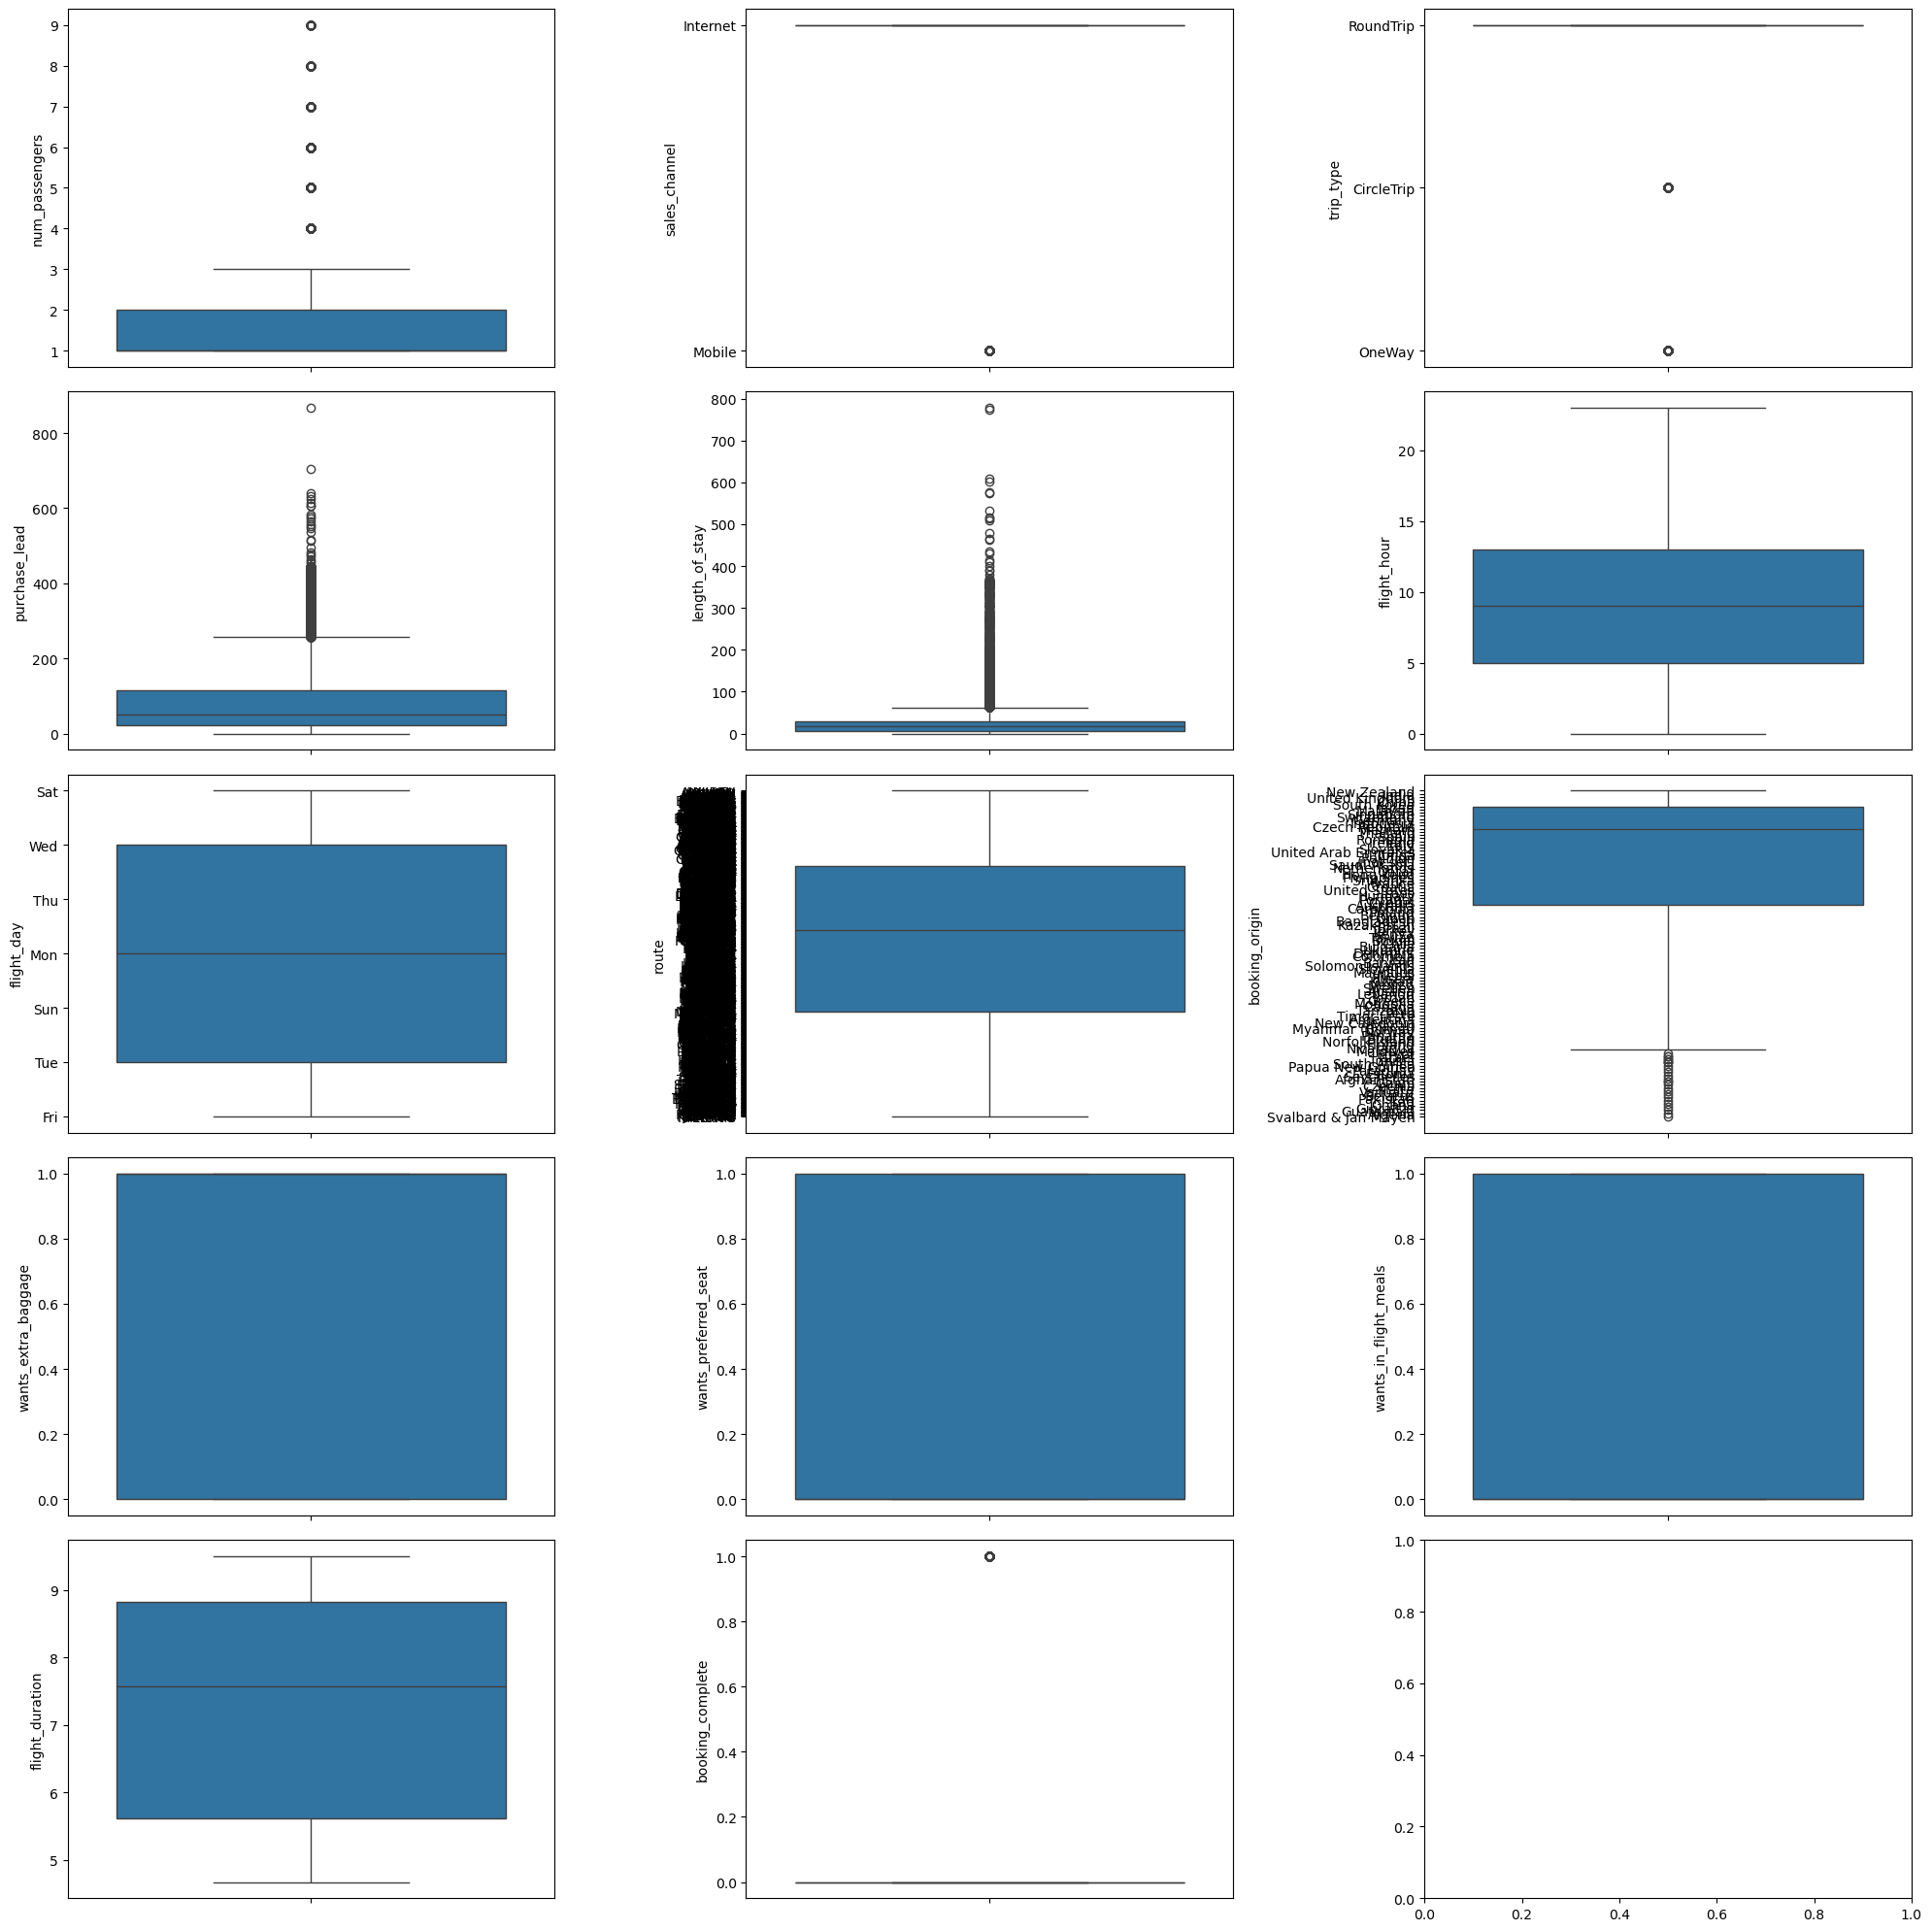

In [150]:
fig, position = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df):
    sns.boxplot(df[column_name], ax=position[index])

plt.tight_layout()
plt.show();

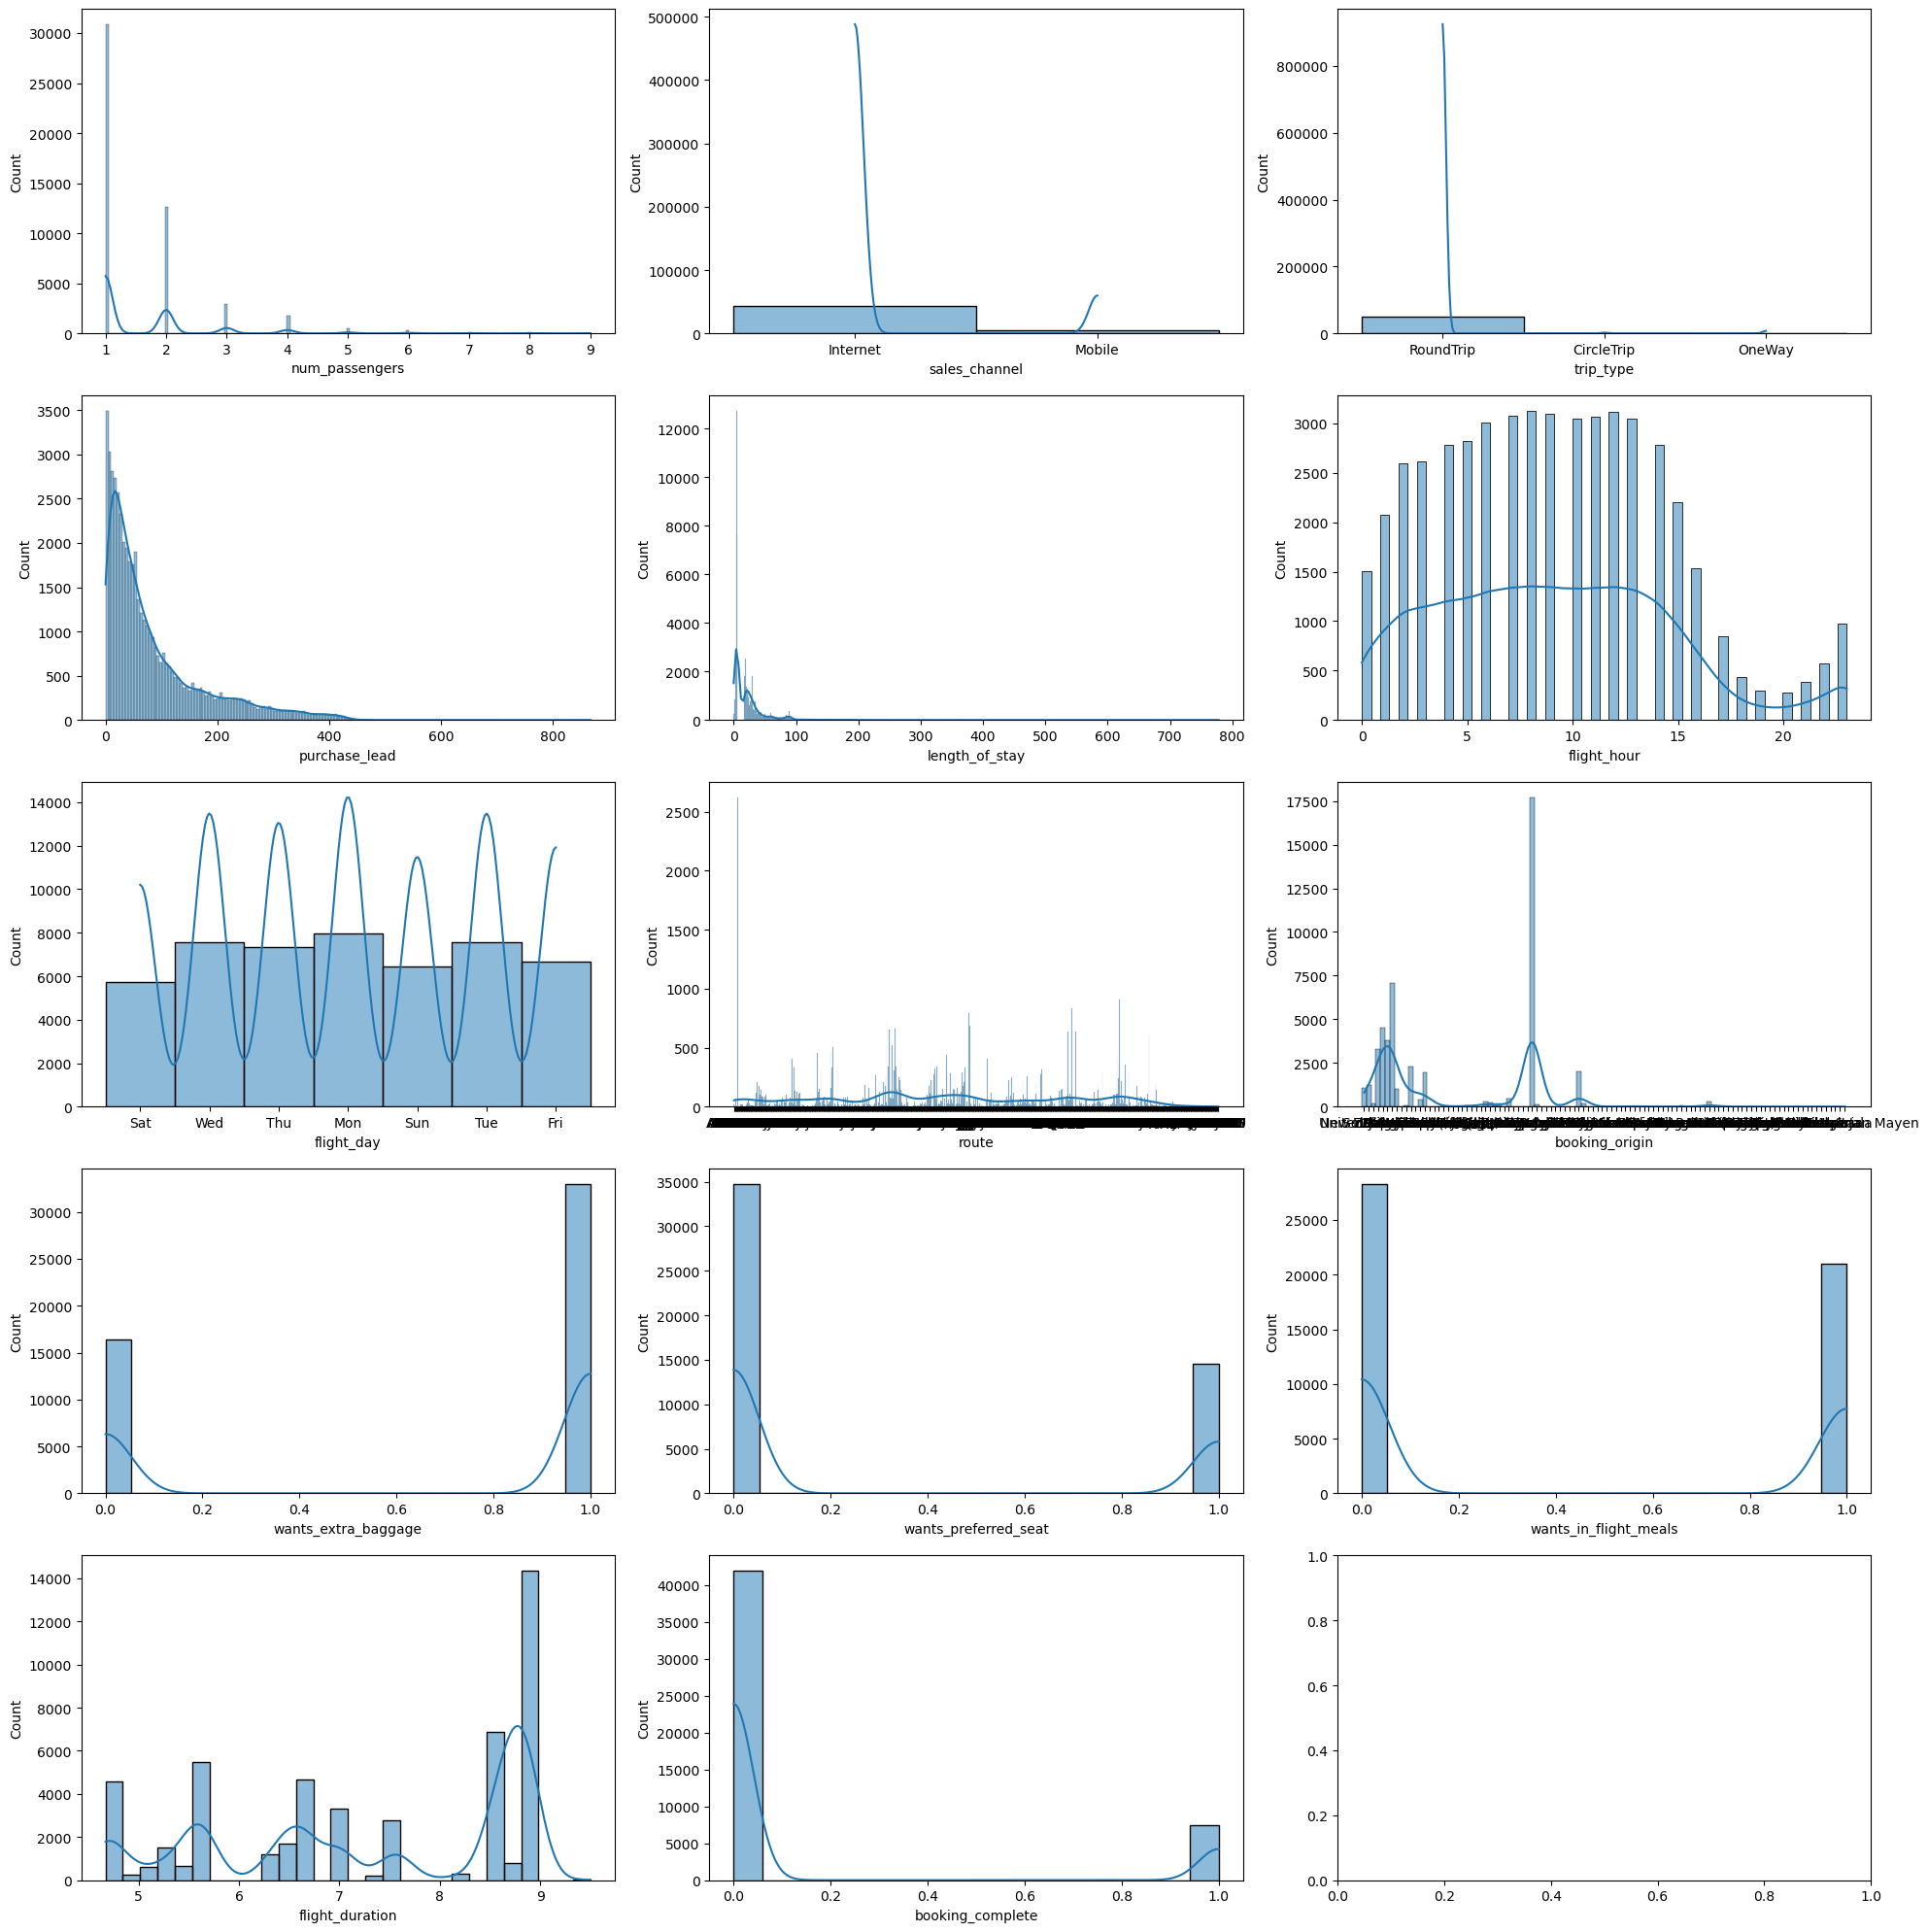

In [151]:
fig, position = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df):
    sns.histplot(df[column_name], ax=position[index], kde=True)

plt.tight_layout()
plt.show();

In [152]:
encoder = LabelEncoder()
for c in df.columns[0:]:
    if (df[c].dtypes=='object'):
        df[c] = encoder.fit_transform(df[c])
    else: 
        df[c] = df[c]

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [153]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,0.108845,1.987460,84.723281,23.053976,9.070676,3.068404,392.313305,38.249589,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,0.311448,0.130733,90.410229,33.832149,5.413099,2.030722,227.270431,32.785767,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.000000,5.000000,1.000000,203.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.000000,9.000000,3.000000,382.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.000000,13.000000,5.000000,611.000000,58.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.000000,23.000000,6.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


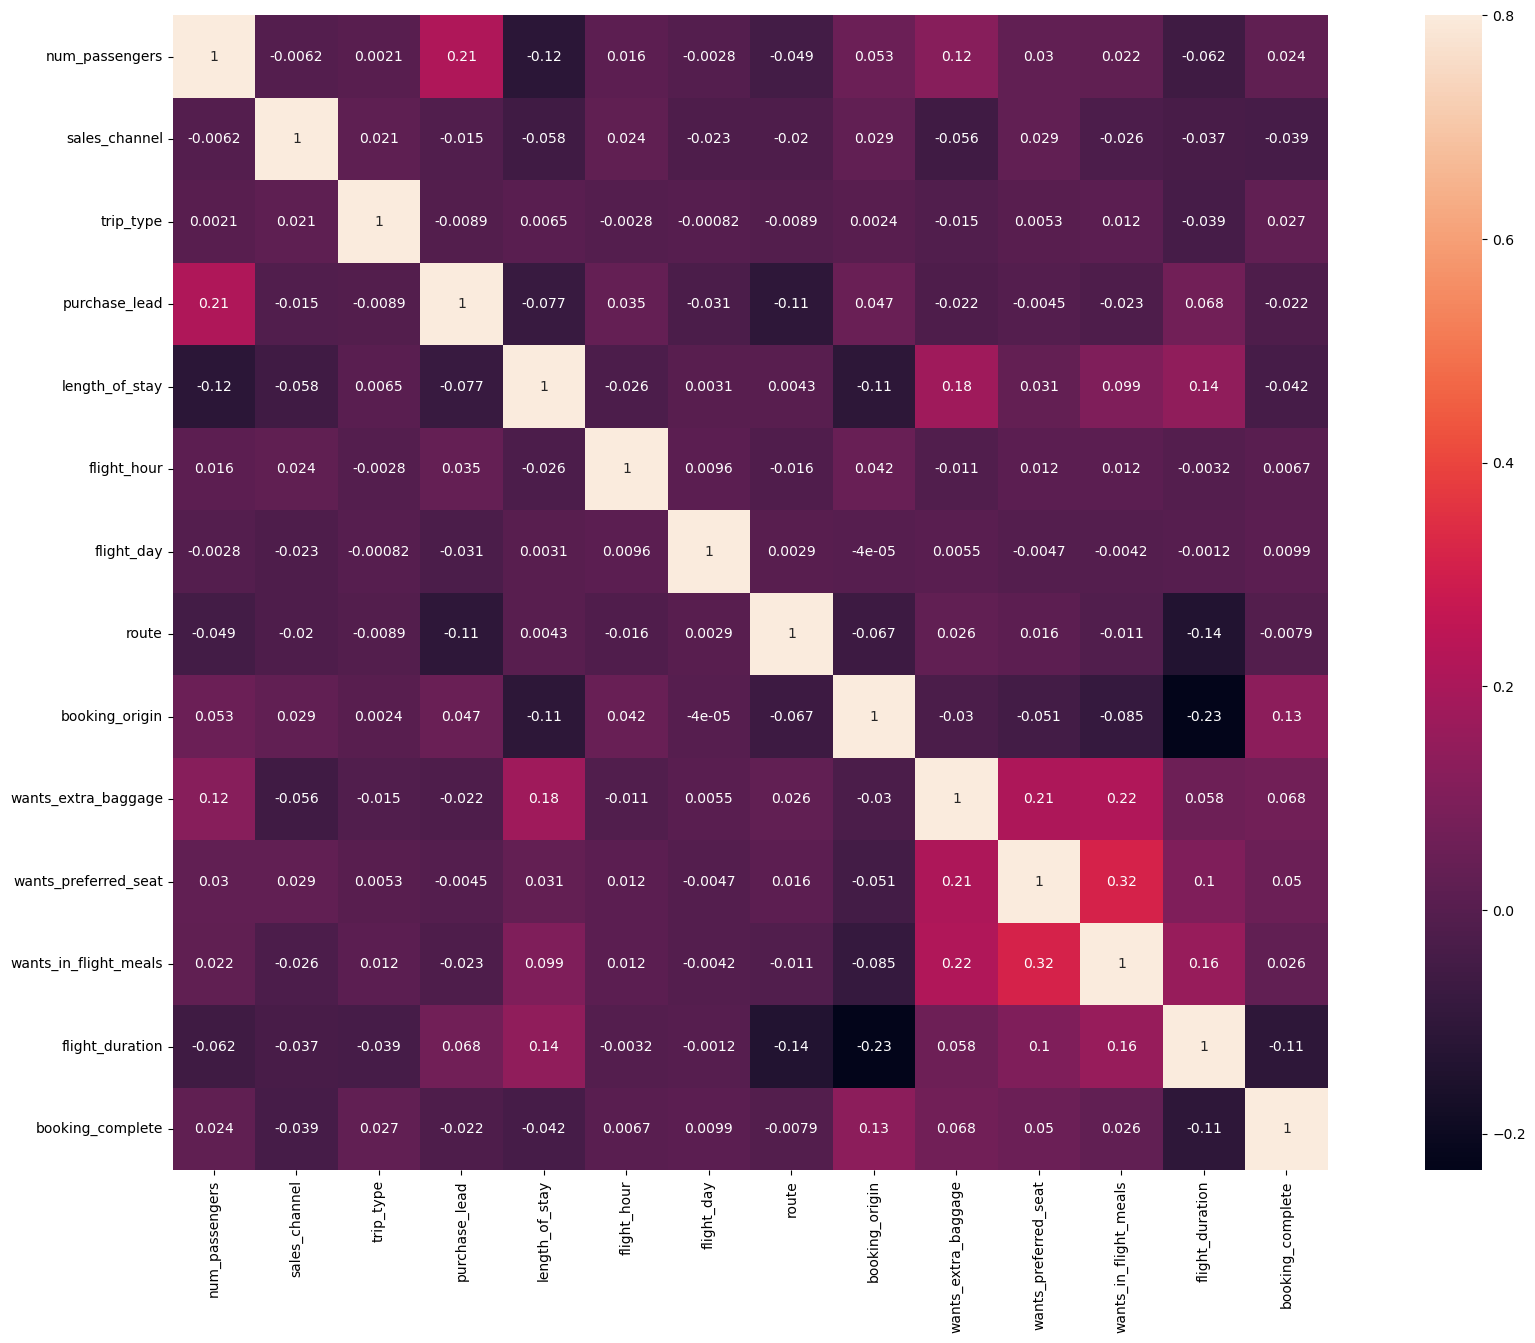

In [154]:
# Correlation 
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmax=0.8, square = True, annot = True);

In [155]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [159]:
df = df.drop("booking_origin", axis=1)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,1,0,1,5.52,0


In [190]:
scaler = MinMaxScaler()

#for c in df.columns[0:]:
 #   if (df[c].dtypes=="number"):
   #     df[c] = scaler.fit_transform(df[c])
    #else:
     #   df[c] = df[c]
        
  

df['purchase_lead'] = scaler.fit_transform(df[['purchase_lead']])
df['length_of_stay'] = scaler.fit_transform(df[['length_of_stay']])
df['flight_hour'] = scaler.fit_transform(df[['flight_hour']])
df['flight_duration'] = scaler.fit_transform(df[['flight_duration']])
df.head() 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,0.302191,0.024422,0.304348,2,0,1,0,0,0.175983,0
1,1,0,2,0.129181,0.025707,0.130435,2,0,0,0,0,0.175983,0
2,2,0,2,0.280277,0.028278,0.739130,6,0,1,1,0,0.175983,0
3,1,0,2,0.110727,0.039846,0.173913,2,0,0,0,1,0.175983,0
4,2,0,2,0.078431,0.028278,0.652174,6,0,1,0,1,0.175983,0


In [192]:
df.columns


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

In [194]:
# Separating the target variable from the rest
df1 = df[['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']]

Target = df[["booking_complete",]]  

In [252]:
# Dividing the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size=0.2, random_state=42)

In [254]:
#using the MinMaxScaler to scale our data

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [256]:
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
32040,4,0,2,0.079585,0.005141,0.043478,4,378,1,0,0,0.343685
16012,2,0,2,0.145329,0.021851,0.130435,4,515,1,0,0,0.861284
41827,2,0,2,0.023068,0.006427,1.000000,1,728,1,0,0,0.196687
8656,1,0,2,0.028835,0.035990,0.347826,4,279,1,0,0,0.175983
6110,3,0,2,0.266436,0.082262,0.565217,5,174,1,0,1,0.861284
...,...,...,...,...,...,...,...,...,...,...,...,...
11435,2,0,2,0.003460,0.066838,1.000000,0,354,1,0,0,0.082816
45357,1,0,2,0.021915,0.007712,0.956522,2,302,0,0,0,0.482402
38667,3,0,2,0.049596,0.006427,0.434783,1,385,0,0,0,0.600414
874,2,0,2,0.339100,0.028278,0.608696,1,6,1,0,1,0.861284


In [258]:
classifiers = [[XGBClassifier(), "XGB Classifier"],
                [RandomForestClassifier(), "Random Forest"],
                [DecisionTreeClassifier(), "Decision Tree"],
                [LogisticRegression(), "Logistic Regression"],
                [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]

In [260]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc_list={}
precision_list={}
recall_list={}
roc_list={}

# for loop
for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train_scaled , y_train)
    model_name = classifier[1]
   
    #test
    pred = model.predict(X_test_scaled)
   
    # Assessing
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
   
    #converting into percentages
    acc_list[model_name] = ([str(round(a_score*100, 2))+ '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2))+ '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2))+ '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2))+ '%'])
   
    if model_name != classifiers[-1][1]:
        print('')

C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<-- XGB Classifier -->

Classification Report:
              precision    recall  f1-score     support
0              0.856094  0.988422  0.917511  8378.00000
1              0.472826  0.058824  0.104630  1479.00000
accuracy       0.848940  0.848940  0.848940     0.84894
macro avg      0.664460  0.523623  0.511071  9857.00000
weighted avg   0.798587  0.848940  0.795542  9857.00000


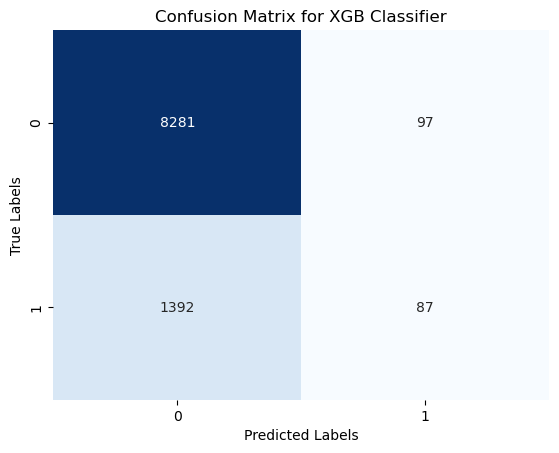

<-- Random Forest -->


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report:
              precision    recall  f1-score      support
0              0.854940  0.992600  0.918641  8378.000000
1              0.523077  0.045977  0.084525  1479.000000
accuracy       0.850563  0.850563  0.850563     0.850563
macro avg      0.689008  0.519288  0.501583  9857.000000
weighted avg   0.805145  0.850563  0.793486  9857.000000


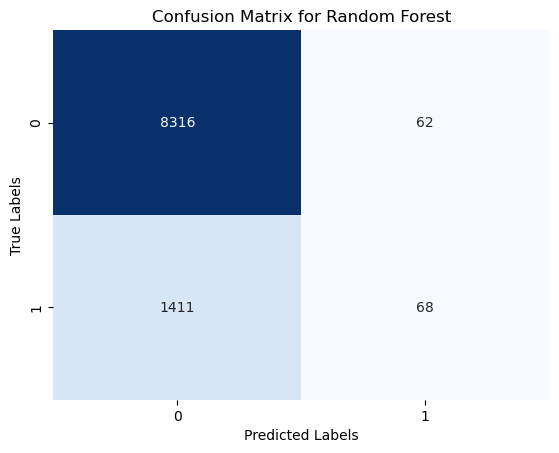

<-- Decision Tree -->

Classification Report:
              precision    recall  f1-score      support
0              0.863753  0.844474  0.854004  8378.000000
1              0.217887  0.245436  0.230843  1479.000000
accuracy       0.754591  0.754591  0.754591     0.754591
macro avg      0.540820  0.544955  0.542424  9857.000000
weighted avg   0.766844  0.754591  0.760502  9857.000000


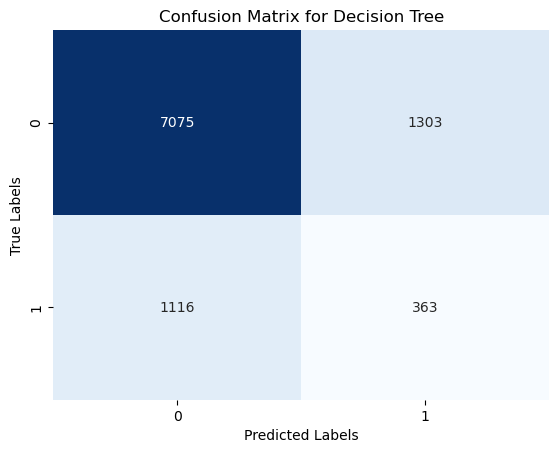

<-- Logistic Regression -->

Classification Report:
              precision    recall  f1-score      support
0              0.849954  1.000000  0.918892  8378.000000
1              0.000000  0.000000  0.000000  1479.000000
accuracy       0.849954  0.849954  0.849954     0.849954
macro avg      0.424977  0.500000  0.459446  9857.000000
weighted avg   0.722422  0.849954  0.781016  9857.000000


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\metrics\_classification.py:1531: Un

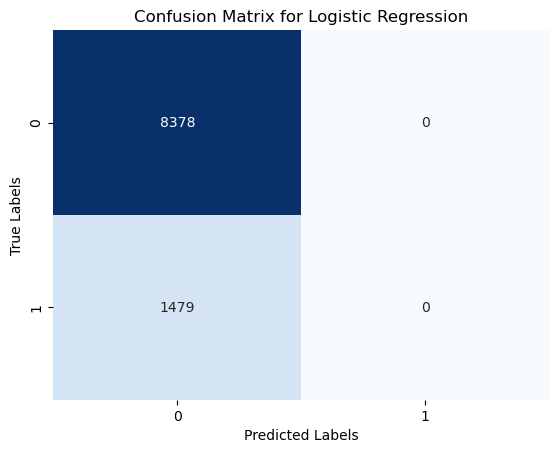

<-- XGBoost -->

Classification Report:
              precision    recall  f1-score     support
0              0.856094  0.988422  0.917511  8378.00000
1              0.472826  0.058824  0.104630  1479.00000
accuracy       0.848940  0.848940  0.848940     0.84894
macro avg      0.664460  0.523623  0.511071  9857.00000
weighted avg   0.798587  0.848940  0.795542  9857.00000


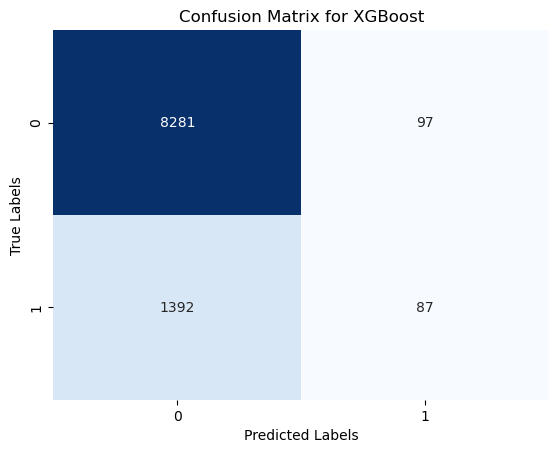


Model Performance Table:
XGB Classifier Random Forest Decision Tree Logistic Regression XGBoost
         84.9%         85.1%         75.5%               85.0%   84.9%


In [262]:
# Initialize a dictionary to store results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

results = {}

# Loop through classifiers
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Store the accuracy in the results dictionary
    results[model_name] = [f"{accuracy * 100:.1f}%"]
    
    # Generate classification report
    report = classification_report(y_test, predictions, output_dict=True)  # Convert to dict
    report_df = pd.DataFrame(report).transpose()  # Convert dict to DataFrame
    print("\nClassification Report:")
    print(report_df)  # Print the tabulated classification report
    
    # Generate confusion matrix
    matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(matrix, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the table in the desired format
print("\nModel Performance Table:")
print(results_df.to_string(index=False))

In [270]:
y_test.value_counts()

booking_complete
0                   8378
1                   1479
Name: count, dtype: int64

C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0    0.85300   0.99463   0.91839      8378
           1    0.48864   0.02907   0.05488      1479

    accuracy                        0.84975      9857
   macro avg    0.67082   0.51185   0.48664      9857
weighted avg    0.79833   0.84975   0.78882      9857



Text(50.722222222222214, 0.5, 'Actual Value')

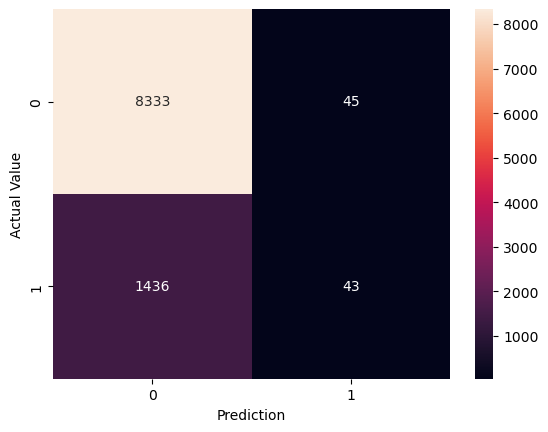

In [274]:
# Trying out the weight balancing on Logistic Regression
# Initialize the model

model = RandomForestClassifier(random_state=42, class_weight={0:1, 1:4})

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Model Evaluation
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.xlabel("Prediction")
plt.ylabel("Actual Value")

In [222]:
# Feature importance

classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [DecisionTreeClassifier(), 'Decision Tree'],
 [LogisticRegression(), 'Logistic Regression'],
 [XGBClassifier(base_score=None, booster=None, callbacks=N

In [226]:
classifiers[1]

[RandomForestClassifier(), 'Random Forest']

In [228]:
classifiers[1][0].feature_importances_

array([1.33536246e-03, 8.34552432e-04, 9.41129745e-05, 5.01377486e-03,
       9.51180668e-03, 3.41906656e-03, 2.04914442e-03, 8.46107751e-03,
       2.37617157e-03, 1.40449355e-03, 8.67808369e-04, 9.70427241e-03,
       9.54928356e-01])

<-- Logistic Regression -->


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      8378
           1       0.25      0.28      0.27      1479

    accuracy                           0.77      9857
   macro avg       0.56      0.57      0.56      9857
weighted avg       0.78      0.77      0.77      9857



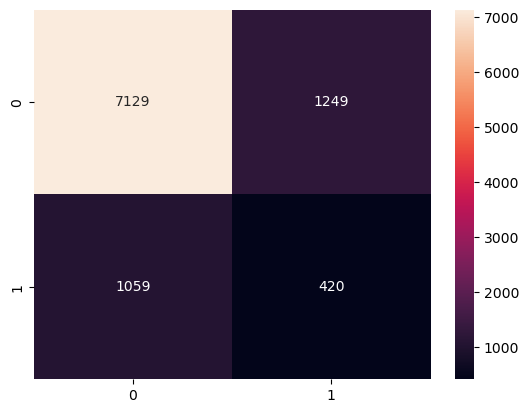

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      8378
           1       0.25      0.23      0.24      1479

    accuracy                           0.78      9857
   macro avg       0.56      0.55      0.56      9857
weighted avg       0.77      0.78      0.78      9857



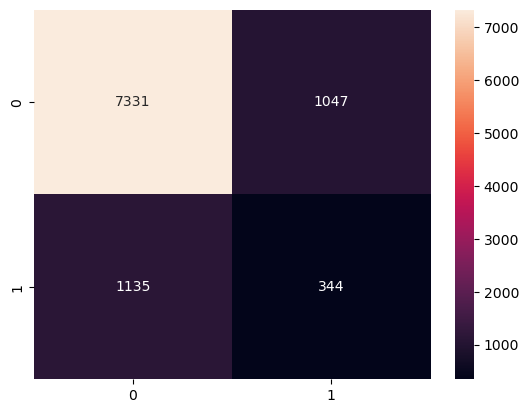

<-- Random Forest -->


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      8378
           1       0.49      0.03      0.05      1479

    accuracy                           0.85      9857
   macro avg       0.67      0.51      0.49      9857
weighted avg       0.80      0.85      0.79      9857



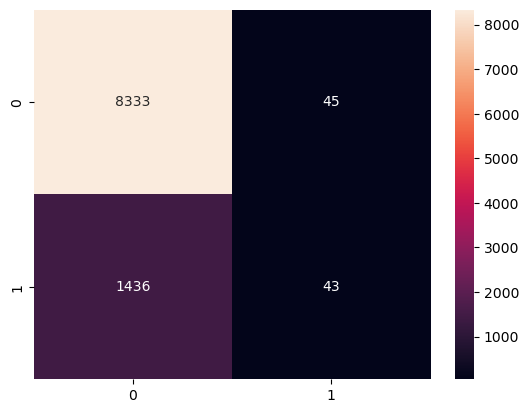

<-- Gradient Boosting -->


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8378
           1       0.25      0.00      0.00      1479

    accuracy                           0.85      9857
   macro avg       0.55      0.50      0.46      9857
weighted avg       0.76      0.85      0.78      9857



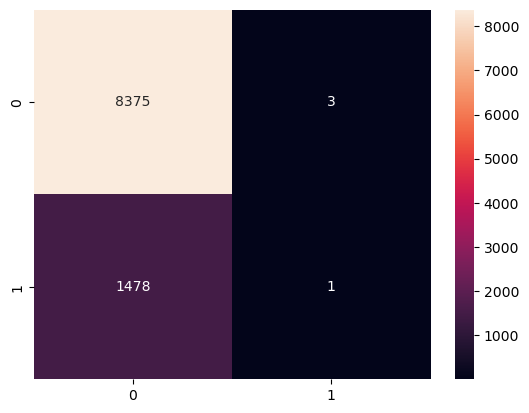

<-- AdaBoost -->


C:\Users\Admin\anacondanew\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8378
           1       0.00      0.00      0.00      1479

    accuracy                           0.85      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857



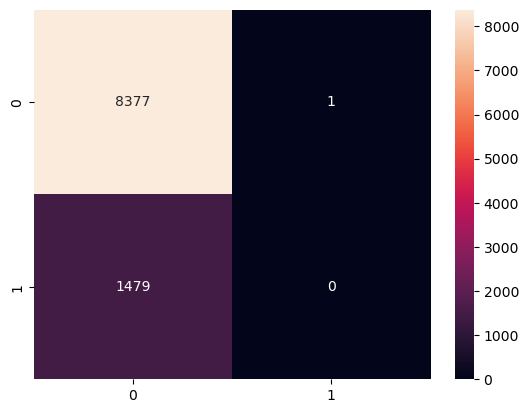

<-- XGBoost -->
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8378
           1       0.47      0.06      0.10      1479

    accuracy                           0.85      9857
   macro avg       0.66      0.52      0.51      9857
weighted avg       0.80      0.85      0.80      9857



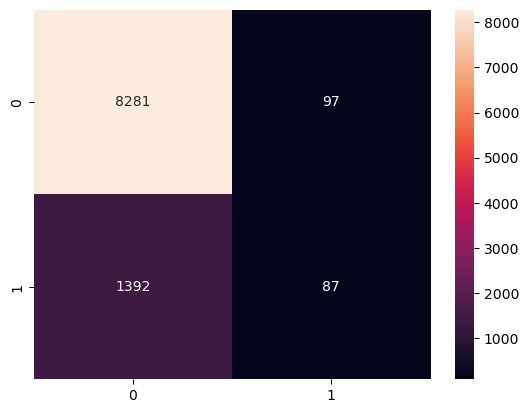

In [278]:
# Confirming the performance of other models

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

class_weights = {0: 1, 1: 4} 

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
     # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

In [308]:
# Feature importance for Random Forest
importances = classifiers[1][0].feature_importances_
importances

array([0.06839568, 0.01073787, 0.00040875, 0.11012946, 0.33007738,
       0.09465386, 0.05753863, 0.14651556, 0.01325574, 0.01624085,
       0.01674592, 0.1353003 ])

In [240]:
feature_names = df1.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

ValueError: All arrays must be of the same length

In [242]:
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,0.302191,0.024422,0.304348,2,0,1,0,0,0.175983
1,1,0,2,0.129181,0.025707,0.130435,2,0,0,0,0,0.175983
2,2,0,2,0.280277,0.028278,0.739130,6,0,1,1,0,0.175983
3,1,0,2,0.110727,0.039846,0.173913,2,0,0,0,1,0.175983
4,2,0,2,0.078431,0.028278,0.652174,6,0,1,0,1,0.175983
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,0.031142,0.007712,0.391304,2,720,1,0,1,0.196687
49996,1,0,2,0.128028,0.007712,0.173913,3,720,0,0,0,0.196687
49997,1,0,2,0.027682,0.007712,0.956522,2,720,0,0,1,0.196687
49998,1,0,2,0.017301,0.007712,0.478261,1,720,1,0,1,0.196687


In [244]:
df1.columns


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration'],
      dtype='object')

We need to balance the minority class with the majority class by oversampling the minority class to balance with the majority class.

In [287]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

scaler = MinMaxScaler()
X = scaler.fit_transform(df1)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [289]:
y_resampled.value_counts()

booking_complete
0    41890
1    41890
Name: count, dtype: int64

In [291]:
y_resampled.value_counts(normalize=True)*100

booking_complete
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='booking_complete', ylabel='count'>

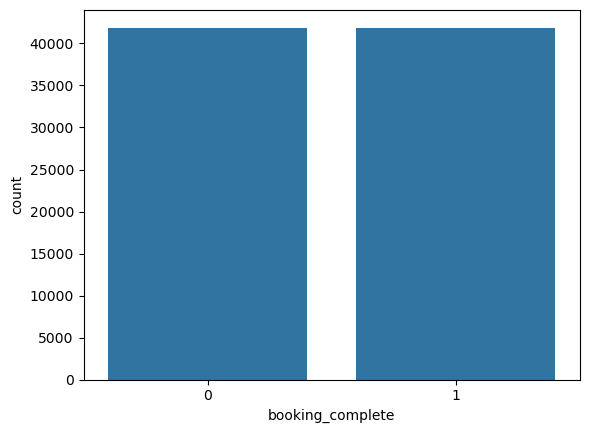

In [293]:
sns.countplot(x=y_resampled)

In [295]:
# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [297]:
from datetime import datetime

===============Logistic Regression===============
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.59      0.59      8314
           1       0.60      0.62      0.61      8442

    accuracy                           0.60     16756
   macro avg       0.60      0.60      0.60     16756
weighted avg       0.60      0.60      0.60     16756



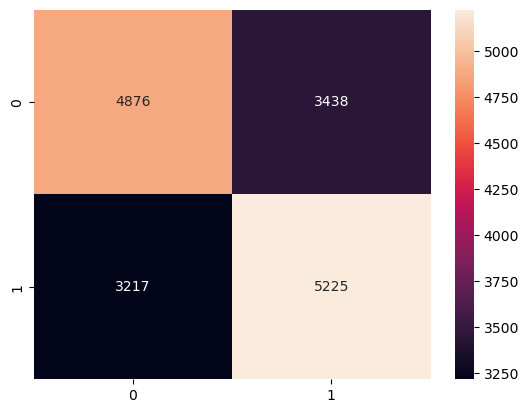

===============Took: 0 seconds to train===============
===============Decision Tree===============
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      8314
           1       0.82      0.85      0.83      8442

    accuracy                           0.83     16756
   macro avg       0.83      0.83      0.83     16756
weighted avg       0.83      0.83      0.83     16756



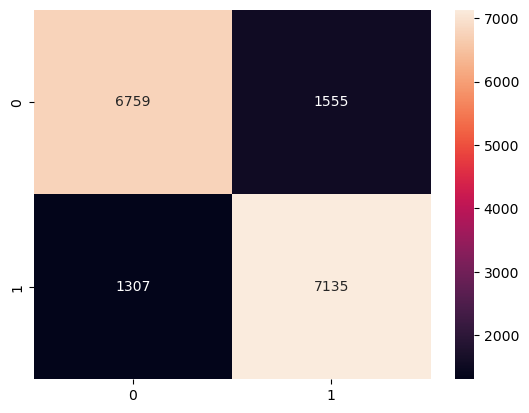

===============Took: 2 seconds to train===============
===============Random Forest===============
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8314
           1       0.94      0.87      0.90      8442

    accuracy                           0.91     16756
   macro avg       0.91      0.91      0.91     16756
weighted avg       0.91      0.91      0.91     16756



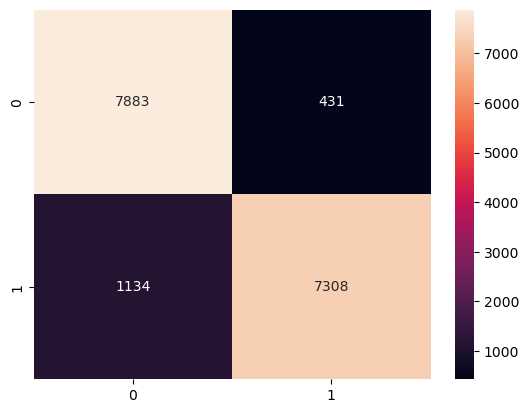

===============Took: 51 seconds to train===============
===============Gradient Boosting===============
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.93      0.84      8314
           1       0.92      0.73      0.81      8442

    accuracy                           0.83     16756
   macro avg       0.84      0.83      0.83     16756
weighted avg       0.84      0.83      0.83     16756



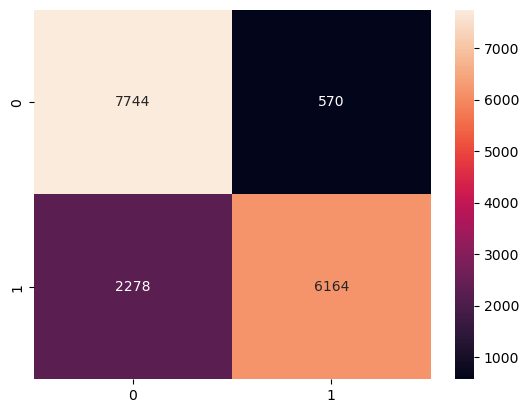

===============Took: 67 seconds to train===============
===============AdaBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      8314
           1       0.75      0.65      0.70      8442

    accuracy                           0.71     16756
   macro avg       0.72      0.72      0.71     16756
weighted avg       0.72      0.71      0.71     16756



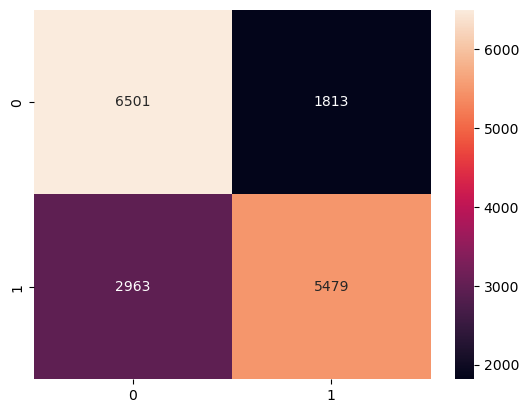

===============Took: 17 seconds to train===============
===============XGBoost===============
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      8314
           1       0.97      0.82      0.89      8442

    accuracy                           0.90     16756
   macro avg       0.91      0.90      0.90     16756
weighted avg       0.91      0.90      0.90     16756



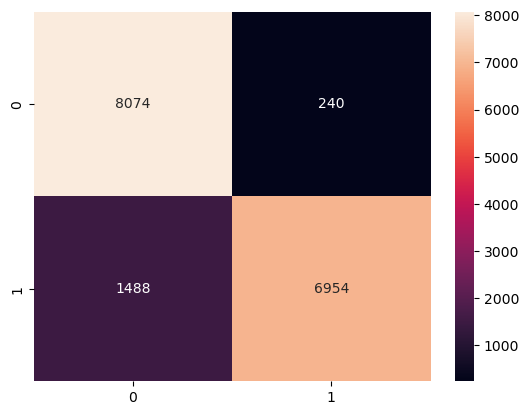

===============Took: 2 seconds to train===============


In [301]:
class_weights = "balanced"

classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
    # [SVC(random_state=42, class_weight=class_weights), 'Support Vector Machine'],
    [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
    [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
    [GradientBoostingClassifier(random_state=42), 'Gradient Boosting'],
    [AdaBoostClassifier(random_state=42, algorithm="SAMME"), 'AdaBoost'],
    [XGBClassifier(eval_metric='mlogloss'), 'XGBoost']
              ]
for classifier in classifiers:
    begin = datetime.now()
    model_name = classifier[1]
    model = classifier[0]
    print("="*15 + model_name + "=" * 15)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()
    end = datetime.now()
    timetaken = end-begin
    print("="*15 + "Took: " + str(timetaken.seconds) + " seconds to train"+ "=" * 15)

In [310]:
# Feature importance for Random Forest
importances = classifiers[1][0].feature_importances_
importances

array([0.06839568, 0.01073787, 0.00040875, 0.11012946, 0.33007738,
       0.09465386, 0.05753863, 0.14651556, 0.01325574, 0.01624085,
       0.01674592, 0.1353003 ])

In [312]:
feature_names = df1.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,num_passengers,0.068396
1,sales_channel,0.010738
2,trip_type,0.000409
3,purchase_lead,0.110129
4,length_of_stay,0.330077
5,flight_hour,0.094654
6,flight_day,0.057539
7,route,0.146516
8,wants_extra_baggage,0.013256
9,wants_preferred_seat,0.016241


In [316]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
4,length_of_stay,0.330077
7,route,0.146516
11,flight_duration,0.135300
3,purchase_lead,0.110129
5,flight_hour,0.094654
0,num_passengers,0.068396
6,flight_day,0.057539
10,wants_in_flight_meals,0.016746
9,wants_preferred_seat,0.016241
8,wants_extra_baggage,0.013256


,Feature,Importance
4,length_of_stay,0.330077
7,route,0.146516
11,flight_duration,0.135300
3,purchase_lead,0.110129
5,flight_hour,0.094654
0,num_passengers,0.068396
6,flight_day,0.057539
10,wants_in_flight_meals,0.016746
9,wants_preferred_seat,0.016241
8,wants_extra_baggage,0.013256


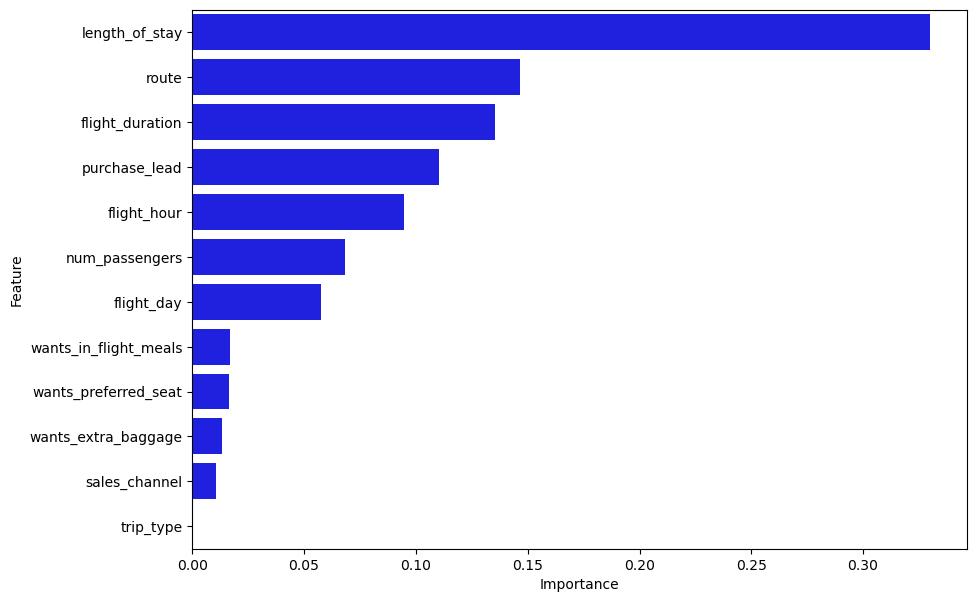

In [318]:
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

In [320]:
from sklearn.model_selection import GridSearchCV
parameter_grid = {
    "max_depth": [20, 30, 50],
    "min_samples_split": [5, 7, 10],
    "class_weight": [{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, "balanced"]
}

In [326]:
grid_search = GridSearchCV(estimator=classifiers[1][0], param_grid=parameter_grid, cv=5, scoring="recall")


In [328]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}, 'balanced'],
                         'max_depth': [20, 30, 50],
                         'min_samples_split': [5, 7, 10]},
             scoring='recall')

In [330]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': 20, 'min_samples_split': 10}
Best score: 0.9042691870127448


              precision    recall  f1-score   support

           0    0.87103   0.62389   0.72703      8314
           1    0.71049   0.90903   0.79759      8442

    accuracy                        0.76755     16756
   macro avg    0.79076   0.76646   0.76231     16756
weighted avg    0.79015   0.76755   0.76258     16756



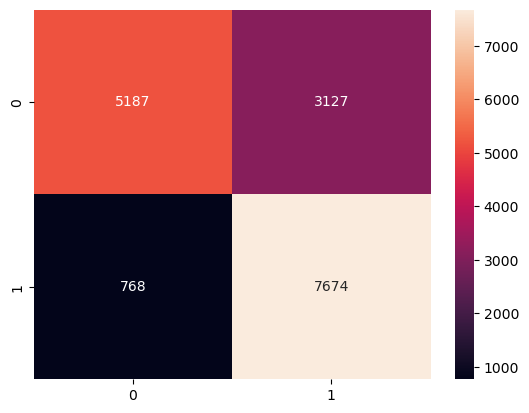

In [344]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt="g")
plt.show()